In [47]:
# Import libraries for analysis
import pandas as pd
import re
import matplotlib.pyplot as plt


In [22]:
# Reading the file using pandas
df = pd.read_csv("/content/assignment_dataset_B.csv",encoding="latin")
df.head()

,Reviewer,ReviewTxt
0,1,Wow... Loved this place.
1,2,Crust is not good.
2,3,Not tasty and the texture was just nasty.
3,4,Stopped by during the late May bank holiday of...
4,5,The selection on the menu was great and so wer...


**Removing StopWords**

In [7]:
# Importing nltk Library
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [19]:
# importing libraries for stopword removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

In [15]:
# Defining Function to remove Stop Word in each review of DataFrame
def stopword_removal(review):
  words = word_tokenize(review) # Tokenize Each Word
  wordsFiltered = [] # Creating Empty list to store the review w/o stop words
  for w in words:
    if w not in stop_words: # Filtering the stop word
        wordsFiltered.append(w) # Appending the required data 
  if wordsFiltered:
    return ' '.join(wordsFiltered) #Joining the words to get review w/o stop word
  else:
    return "none"
  

In [23]:
df['Review_w/oSW'] = df['ReviewTxt'].apply(stopword_removal) # Applying stop word removal function

In [26]:
df.head()

,Reviewer,ReviewTxt,Review_w/oSW
0,1,Wow... Loved this place.,Wow ... Loved place .
1,2,Crust is not good.,Crust good .
2,3,Not tasty and the texture was just nasty.,Not tasty texture nasty .
3,4,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...
4,5,The selection on the menu was great and so wer...,The selection menu great prices .


**Masking the ORD#123-123456**

In [25]:
# Function for masking of data
def masking_data(review):
  x = re.sub("ORD#[0-9]{3}-[0-9]{6}","ORDER***",review) # replacing the Required Pattern with a Mask 
  return x
df['ReviewTxt'] = df['ReviewTxt'].apply(masking_data) #Masking the Main Review Column

In [29]:
df.head(10)

,Reviewer,ReviewTxt,Review_w/oSW
0,1,Wow... Loved this place.,Wow ... Loved place .
1,2,Crust is not good.,Crust good .
2,3,Not tasty and the texture was just nasty.,Not tasty texture nasty .
3,4,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...
4,5,The selection on the menu was great and so wer...,The selection menu great prices .
5,6,Now I am getting angry and I want my damn pho.,Now I getting angry I want damn pho .
6,7,"Not a Punjabi resturant, their Palak Paneer wa...","Not Punjabi resturant , Palak Paneer best Pune ."
7,8,I ordered this through Zomato ORDER***. The de...,I ordered Zomato ORD # 176-678765 . The delive...
8,9,This resturant was recommended to me by my fri...,This resturant recommended friend . It multipl...
9,10,I never heard of this resturant before. Zomato...,I never heard resturant . Zomato recommended P...


**Find Sentiment in Range 0 to 5**

In [30]:
# Using TextBlob to Calculate the Sentiment
from textblob import TextBlob

In [36]:
# Create Function and Bins to calculate the Polarity followed by Rating b/w 0 to 5  
def Review_Sentiment(Review):
  Sentiment = TextBlob(Review).sentiment
  if Sentiment.polarity>0.75:
    return 5
  elif Sentiment.polarity>0.5 and Sentiment.polarity<=0.75:
    return 4
  elif Sentiment.polarity>0 and Sentiment.polarity<=0.5:
    return 3
  elif Sentiment.polarity<0 and Sentiment.polarity>=-0.5:
    return 2
  elif Sentiment.polarity<-0.5 and Sentiment.polarity>=-0.75:
    return 1
  else:
    return 0

In [37]:
df['Review_Sentiment'] = df['ReviewTxt'].apply(Review_Sentiment) # Evaluating Rating for Each Review

In [38]:
df.head()

,Reviewer,ReviewTxt,Review_w/oSW,Review_Sentiment
0,1,Wow... Loved this place.,Wow ... Loved place .,3
1,2,Crust is not good.,Crust good .,2
2,3,Not tasty and the texture was just nasty.,Not tasty texture nasty .,0
3,4,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...,3
4,5,The selection on the menu was great and so wer...,The selection menu great prices .,5


**Overall Rating**

In [39]:
# Checking the parameters of DataFrame
df.describe()

,Reviewer,Review_Sentiment
count,100.000000,100.000000
mean,50.500000,2.470000
std,29.011492,1.660321
min,1.000000,0.000000
25%,25.750000,1.000000
50%,50.500000,3.000000
75%,75.250000,4.000000
max,100.000000,5.000000


In [44]:
# Using average to calculate the overall rating of the Reviews
Overall_Rating=df['Review_Sentiment'].mean()
print("Overall Rating of Review is", Overall_Rating)

Overall Rating of Review is 2.47


**Top Selling Food**

There are 1153 words in the combination of all review.


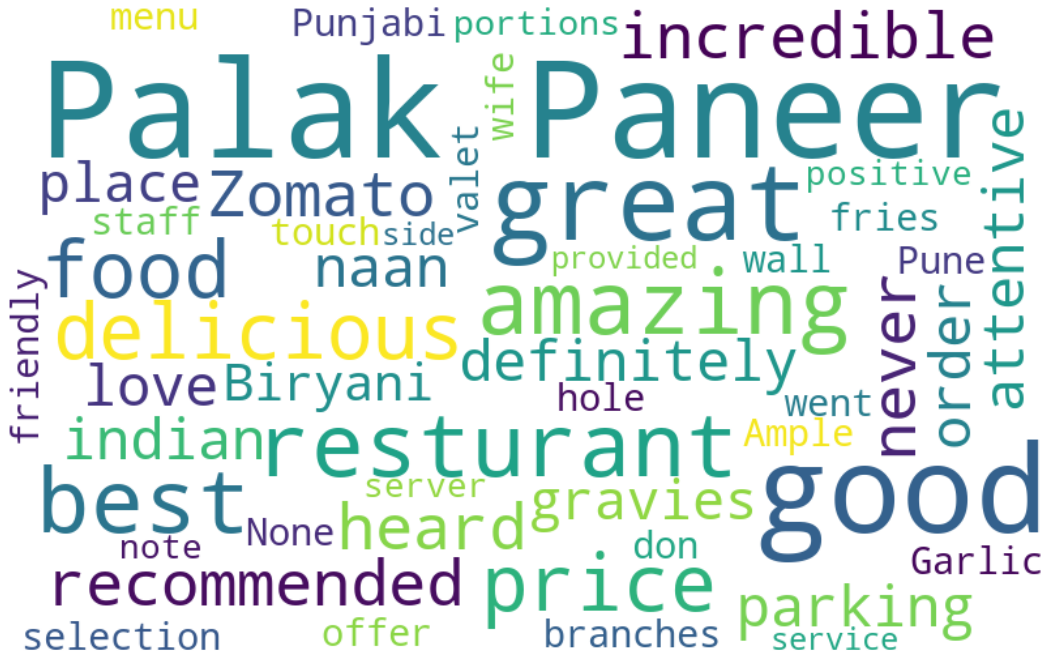

In [71]:
# Word Cloud of Rating >3 is created because Top Selling Food will always bring Positive Reviews
from wordcloud import WordCloud
Top_Selling_Df = df[df['Review_Sentiment'] > 3] #Creating DataFrame for Review Rating >3 
text = " ".join(review for review in Top_Selling_Df['Review_w/oSW'])# Joining the Review_Text for all Best reviews 
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image for Best Reviews 
wordcloud = WordCloud(background_color="white", width=800, height=500, max_words=50).generate(text) #Plotting top 50 words
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
# From Word Cloud , Top Selling Food
print("Top Selling Food is Palak Paneer")

Top Selling Food is Palak Paneer


**Worst Selling Food**

There are 3436 words in the combination of all review.


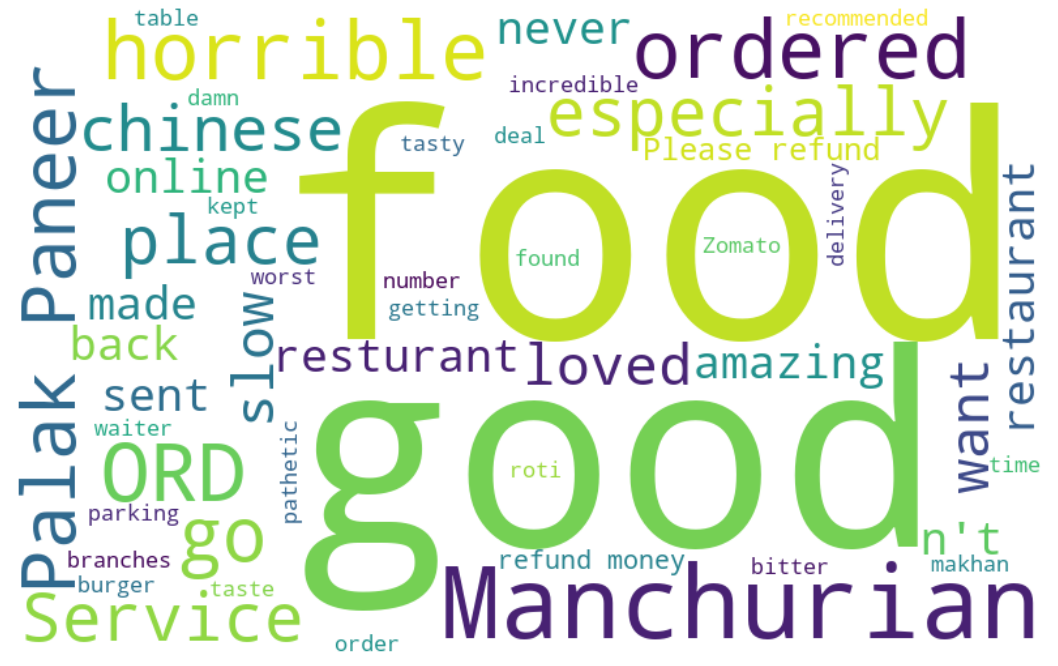

In [70]:
# Word Cloud of Rating <3 is created because Worst Selling Food will always bring Negative Reviews
from wordcloud import WordCloud
Worst_Selling_Df = df[df['Review_Sentiment'] < 4] #Creating DataFrame for Review Rating <3 
text = " ".join(review for review in Worst_Selling_Df['Review_w/oSW']) # Joining the Review_Text for all worst reviews 
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image for Worst Reviews 
wordcloud = WordCloud(background_color="white", width=800, height=500, max_words=50).generate(text)#Plotting top 50 words
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
# From Word Cloud , Worst Selling Food
print("Top Selling Food is Manchurian")

Top Selling Food is Manchurian
